# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [94]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [95]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [96]:
print(data.shape)
print(data.isna().values.any()) # Check for missing values, ok if False
print(data.duplicated().values.any()) # Check for duplicates, ok if False
print(data.nunique())
print(data.dtypes)
print(data.info())

(5391, 6)
False
False
Rank                     5391
Release_Date             2262
Movie_Title              5318
USD_Production_Budget     484
USD_Worldwide_Gross      4969
USD_Domestic_Gross       4809
dtype: int64
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [97]:
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget.str.replace(',', '', regex=True).str.replace('$', '', regex=True))
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross.str.replace(',', '', regex=True).str.replace('$', '', regex=True))
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross.str.replace(',', '', regex=True).str.replace('$', '', regex=True))

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [98]:
print(data.Release_Date)
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

0         8/2/1915
1         5/9/1916
2       12/24/1916
3        9/17/1920
4         1/1/1925
           ...    
5386     10/8/2018
5387    12/18/2018
5388    12/31/2020
5389    12/31/2020
5390    12/31/2020
Name: Release_Date, Length: 5391, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [99]:
print(data.USD_Production_Budget.mean()) # shows the average production budget
print(data.USD_Worldwide_Gross.mean()) # shows the average worldwide gross
print(f"Minimum Domestic Revenue: {data.USD_Domestic_Gross.min()} $\n"
    f"Minimum Worldwide Revenue: {data.USD_Worldwide_Gross.min()} $\n"
    f"Minimum Production Budget: {data.USD_Production_Budget.min()} $\n"
    f"Maximum Production Budget: {data.USD_Production_Budget.max()} $\n"
    f"Maximum Domestic Revenue: {data.USD_Domestic_Gross.max()} $\n"
    f"Maximum Worldwide Revenue: {data.USD_Worldwide_Gross.max()} $\n"
    f"Average Production Budget: {data.USD_Production_Budget.mean()} $\n"
    f"Average Domestic Revenue: {data.USD_Domestic_Gross.mean()} $\n"
    f"Average Worldwide Revenue: {data.USD_Worldwide_Gross.mean()} $\n"
    f"Median Production Budget: {data.USD_Production_Budget.median()} $\n"
    f"Median Domestic Revenue: {data.USD_Domestic_Gross.median()} $\n"
    f"Median Worldwide Revenue: {data.USD_Worldwide_Gross.median()} $\n")
data.describe()

31113737.57837136
88855421.96271564
Minimum Domestic Revenue: 0 $
Minimum Worldwide Revenue: 0 $
Minimum Production Budget: 1100 $
Maximum Production Budget: 425000000 $
Maximum Domestic Revenue: 936662225 $
Maximum Worldwide Revenue: 2783918982 $
Average Production Budget: 31113737.57837136 $
Average Domestic Revenue: 41235519.44314598 $
Average Worldwide Revenue: 88855421.96271564 $
Median Production Budget: 17000000.0 $
Median Domestic Revenue: 17192205.0 $
Median Worldwide Revenue: 27450453.0 $



,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [100]:
zero_gross_domestic = data[data.USD_Domestic_Gross == 0]
print(zero_gross_domestic.shape)
# find the index of the movie with the highest production budget that has a zero gross
losers = zero_gross_domestic.sort_values(by='USD_Production_Budget', ascending=False)
losers.head(10)

(512, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**How many films grossed $0 in the US but had an international gross? What were the highest budget films that grossed nothing in the US but had an international gross?

In [101]:
just_international_revenue = data[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(just_international_revenue.shape)
just_international_revenue.sort_values(by='USD_Production_Budget', ascending=False).head(10)

(155, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4763,1434,2014-12-31,Dragon Nest Warriors' Dawn,40000000,196090,0
5271,1433,2016-11-11,USS Indianapolis: Men of Courage,40000000,1079040,0
4371,1432,2013-04-16,Un monstre à Paris,40000000,27000381,0
3208,1472,2008-08-26,Virgin Territory,38000000,5473041,0
3539,1489,2009-12-31,Obitaemyy ostrov,36500000,15000000,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [102]:
just_international_revenue = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(just_international_revenue.shape)

(155, 6)


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [103]:
zero_gross_worldwide = data[data.USD_Worldwide_Gross == 0]
print(zero_gross_worldwide.shape)
# find the index of the movie with the highest production budget that had no revenue internationally
losers = zero_gross_worldwide.sort_values(by='USD_Production_Budget', ascending=False)
losers.head(10)

(357, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [104]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
not_yet_screened = data[data.Release_Date > scrape_date]
print(not_yet_screened.shape)
data_clean = data[data.Release_Date < scrape_date]
data_clean.shape

(7, 6)


(5384, 6)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [105]:
no_gain = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print(no_gain.shape)
print(f"{no_gain.shape[0] / data_clean.shape[0] * 100:.2f}% of movies lost money")

(2007, 6)
37.28% of movies lost money


# Seaborn for Data Viz: Bubble Charts

<AxesSubplot: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

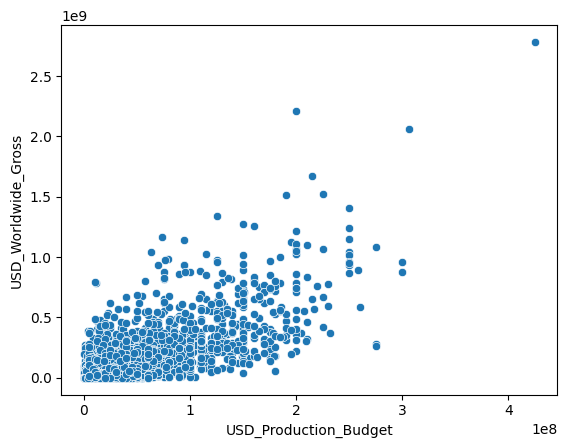

In [106]:
sns.scatterplot(x='USD_Production_Budget', y='USD_Worldwide_Gross', data=data_clean)

Because Seaborn is built on top of Matplotlib, we can use the same syntax to create a bubble chart.

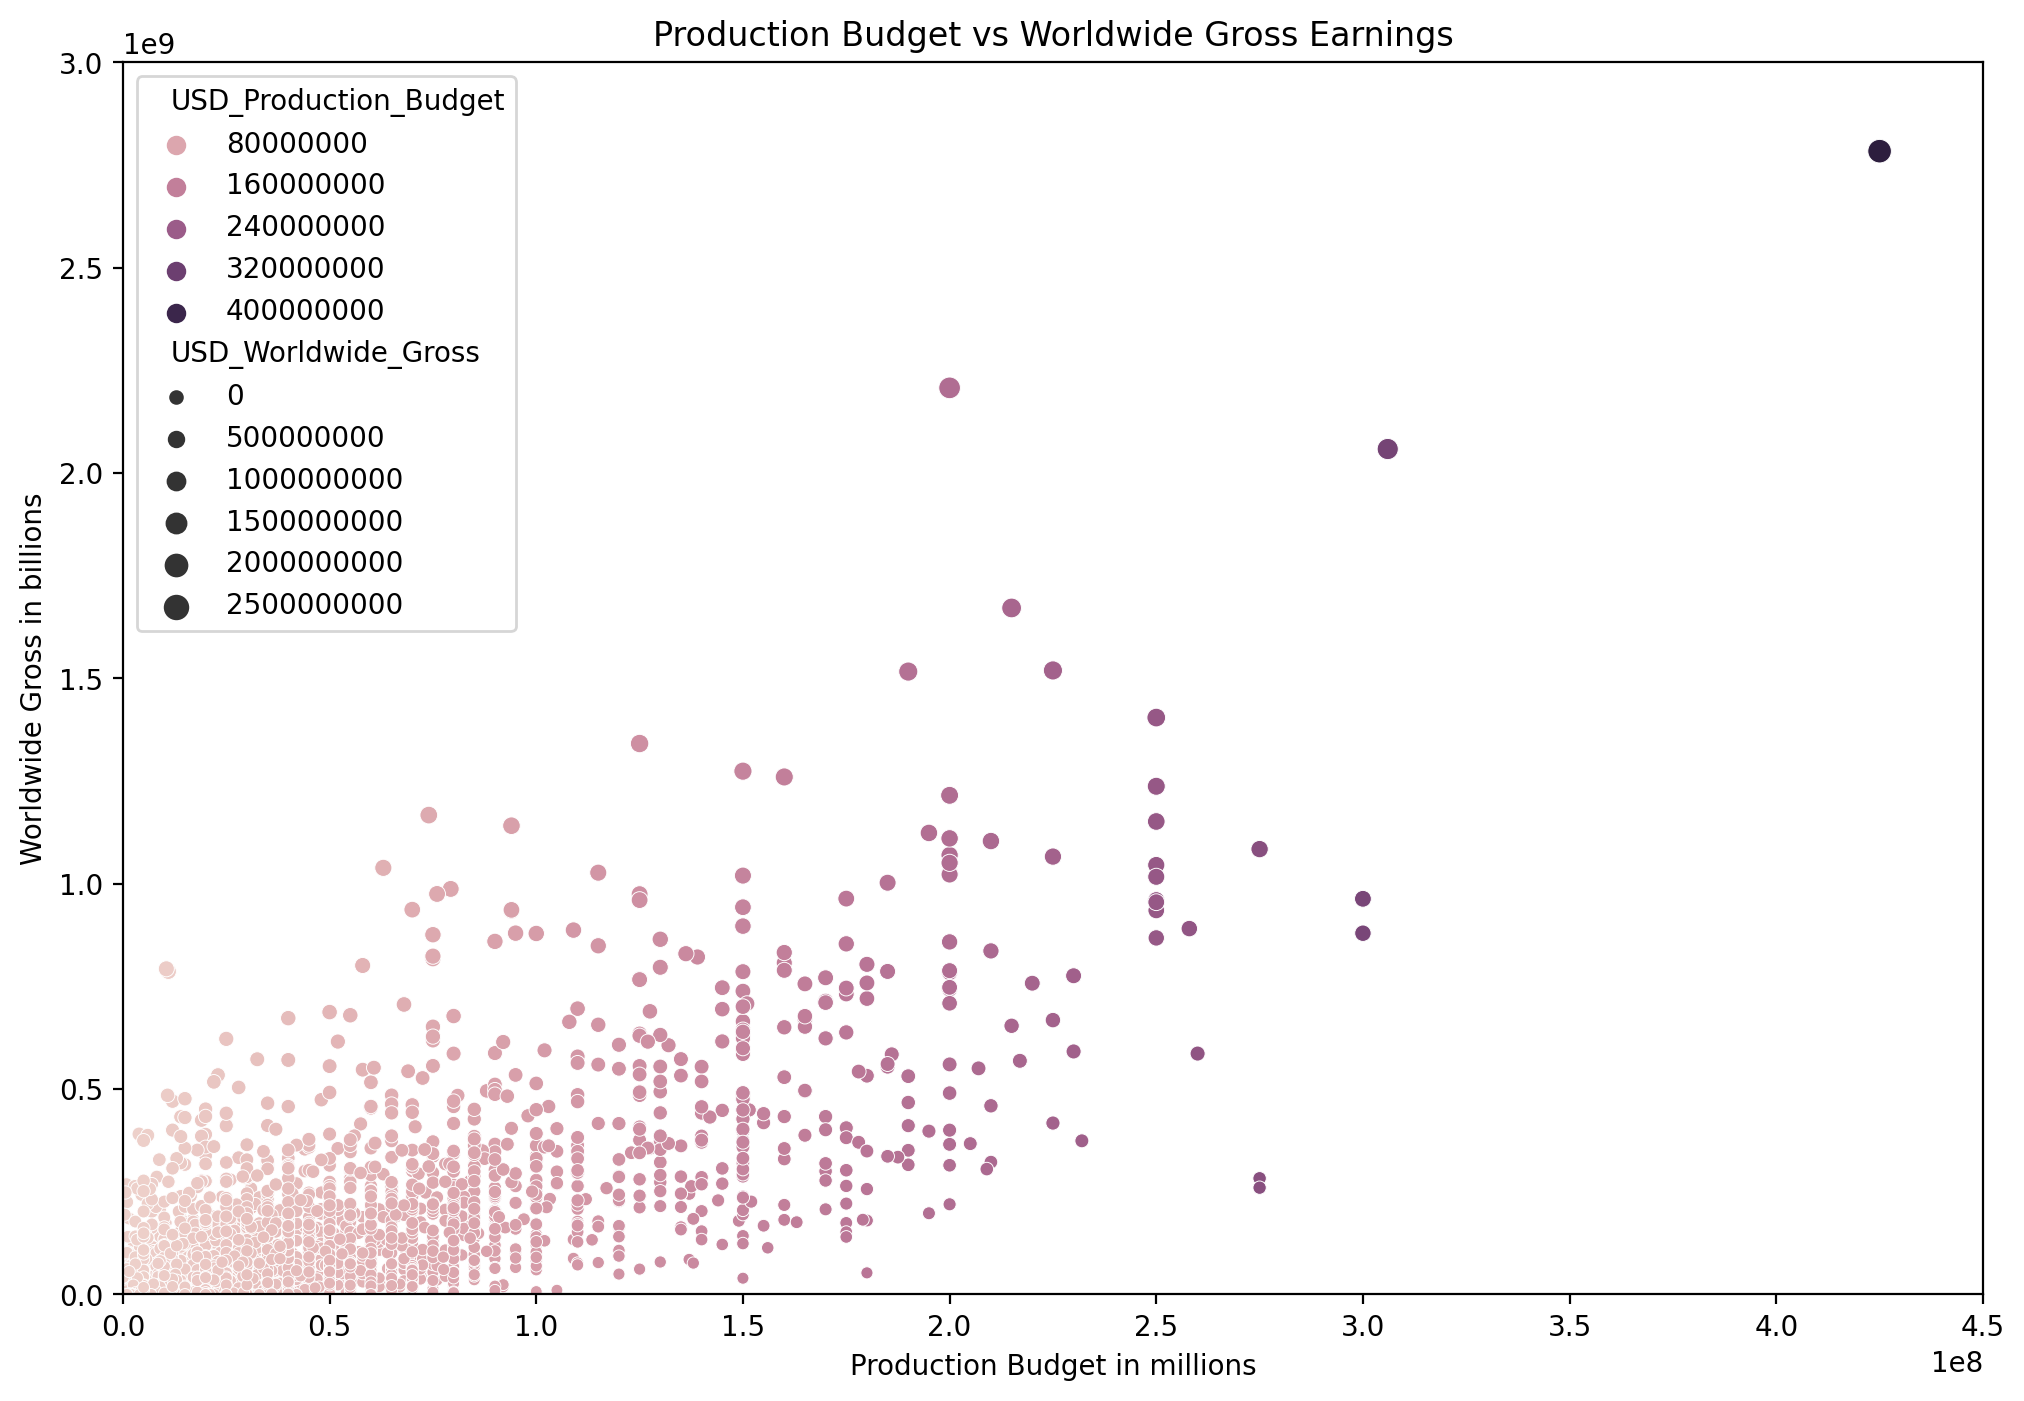

In [107]:
plt.figure(figsize=(12,8), dpi=200)
sns_graph = sns.scatterplot(x='USD_Production_Budget', 
                            y='USD_Worldwide_Gross', 
                            data=data_clean,
                            hue='USD_Production_Budget', # color by production budget
                            size='USD_Worldwide_Gross') # size by worldwide gross
sns_graph.set(xlabel='Production Budget in millions',
              ylabel='Worldwide Gross in billions',
              title='Production Budget vs Worldwide Gross Earnings',
              xlim=(0, 450000000),
              ylim=(0, 3000000000))

plt.show()

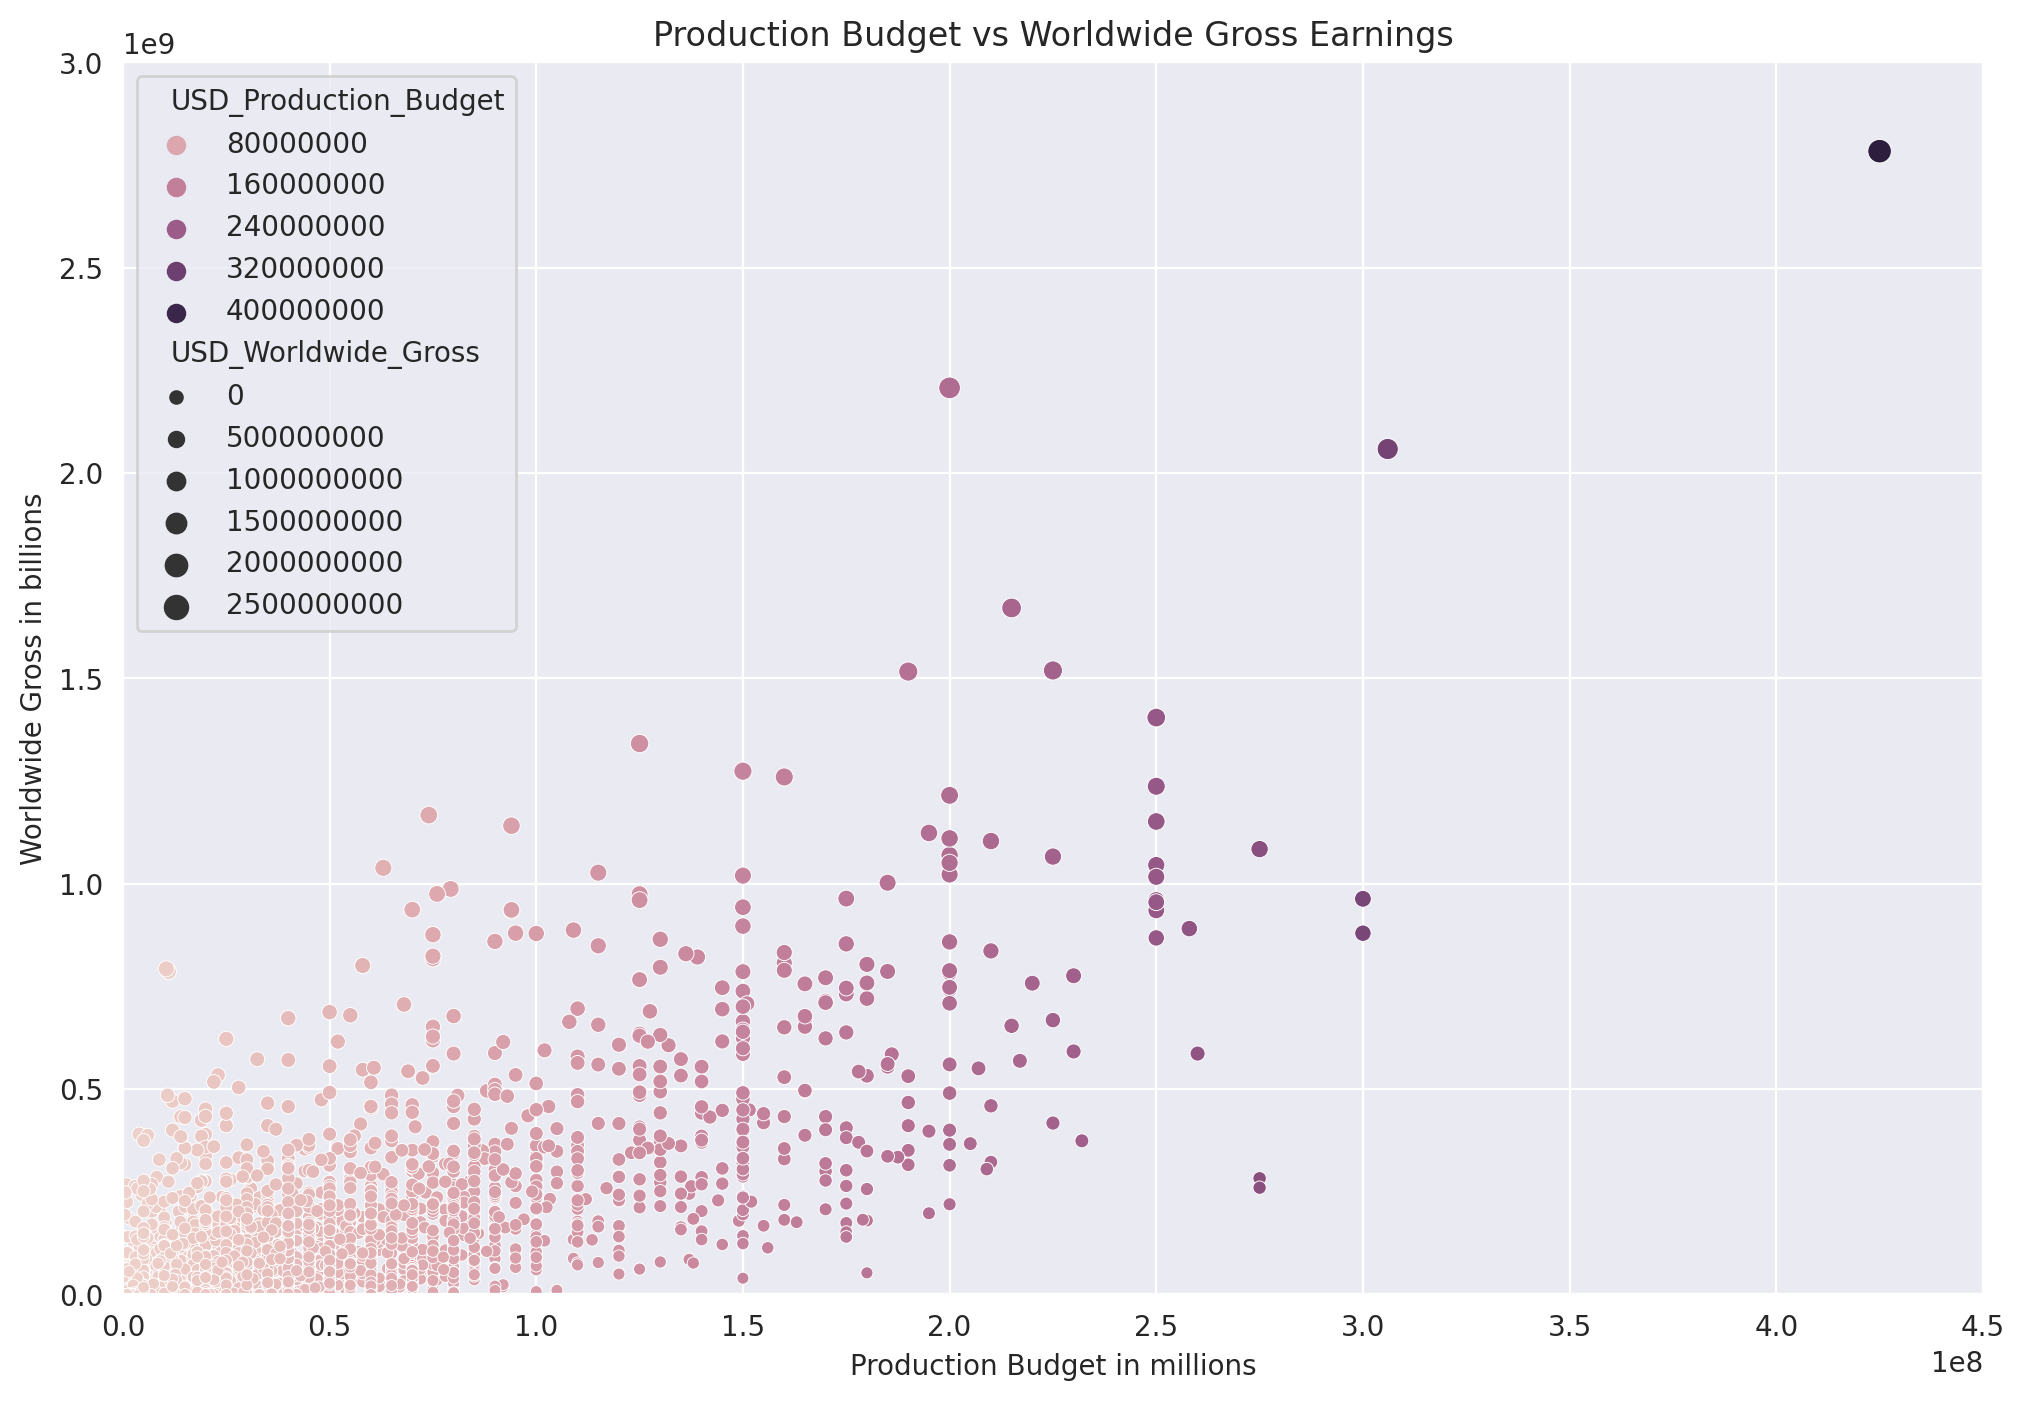

In [108]:
plt.figure(figsize=(12,8), dpi=200)

with sns.axes_style('darkgrid'):
    sns_graph = sns.scatterplot(x='USD_Production_Budget', 
                                y='USD_Worldwide_Gross', 
                                data=data_clean,
                                hue='USD_Production_Budget', # color by production budget
                                size='USD_Worldwide_Gross') # size by worldwide gross
    sns_graph.set(xlabel='Production Budget in millions',
                ylabel='Worldwide Gross in billions',
                title='Production Budget vs Worldwide Gross Earnings',
                xlim=(0, 450000000),
                ylim=(0, 3000000000))
plt.show()

### Plotting Movie Releases over Time

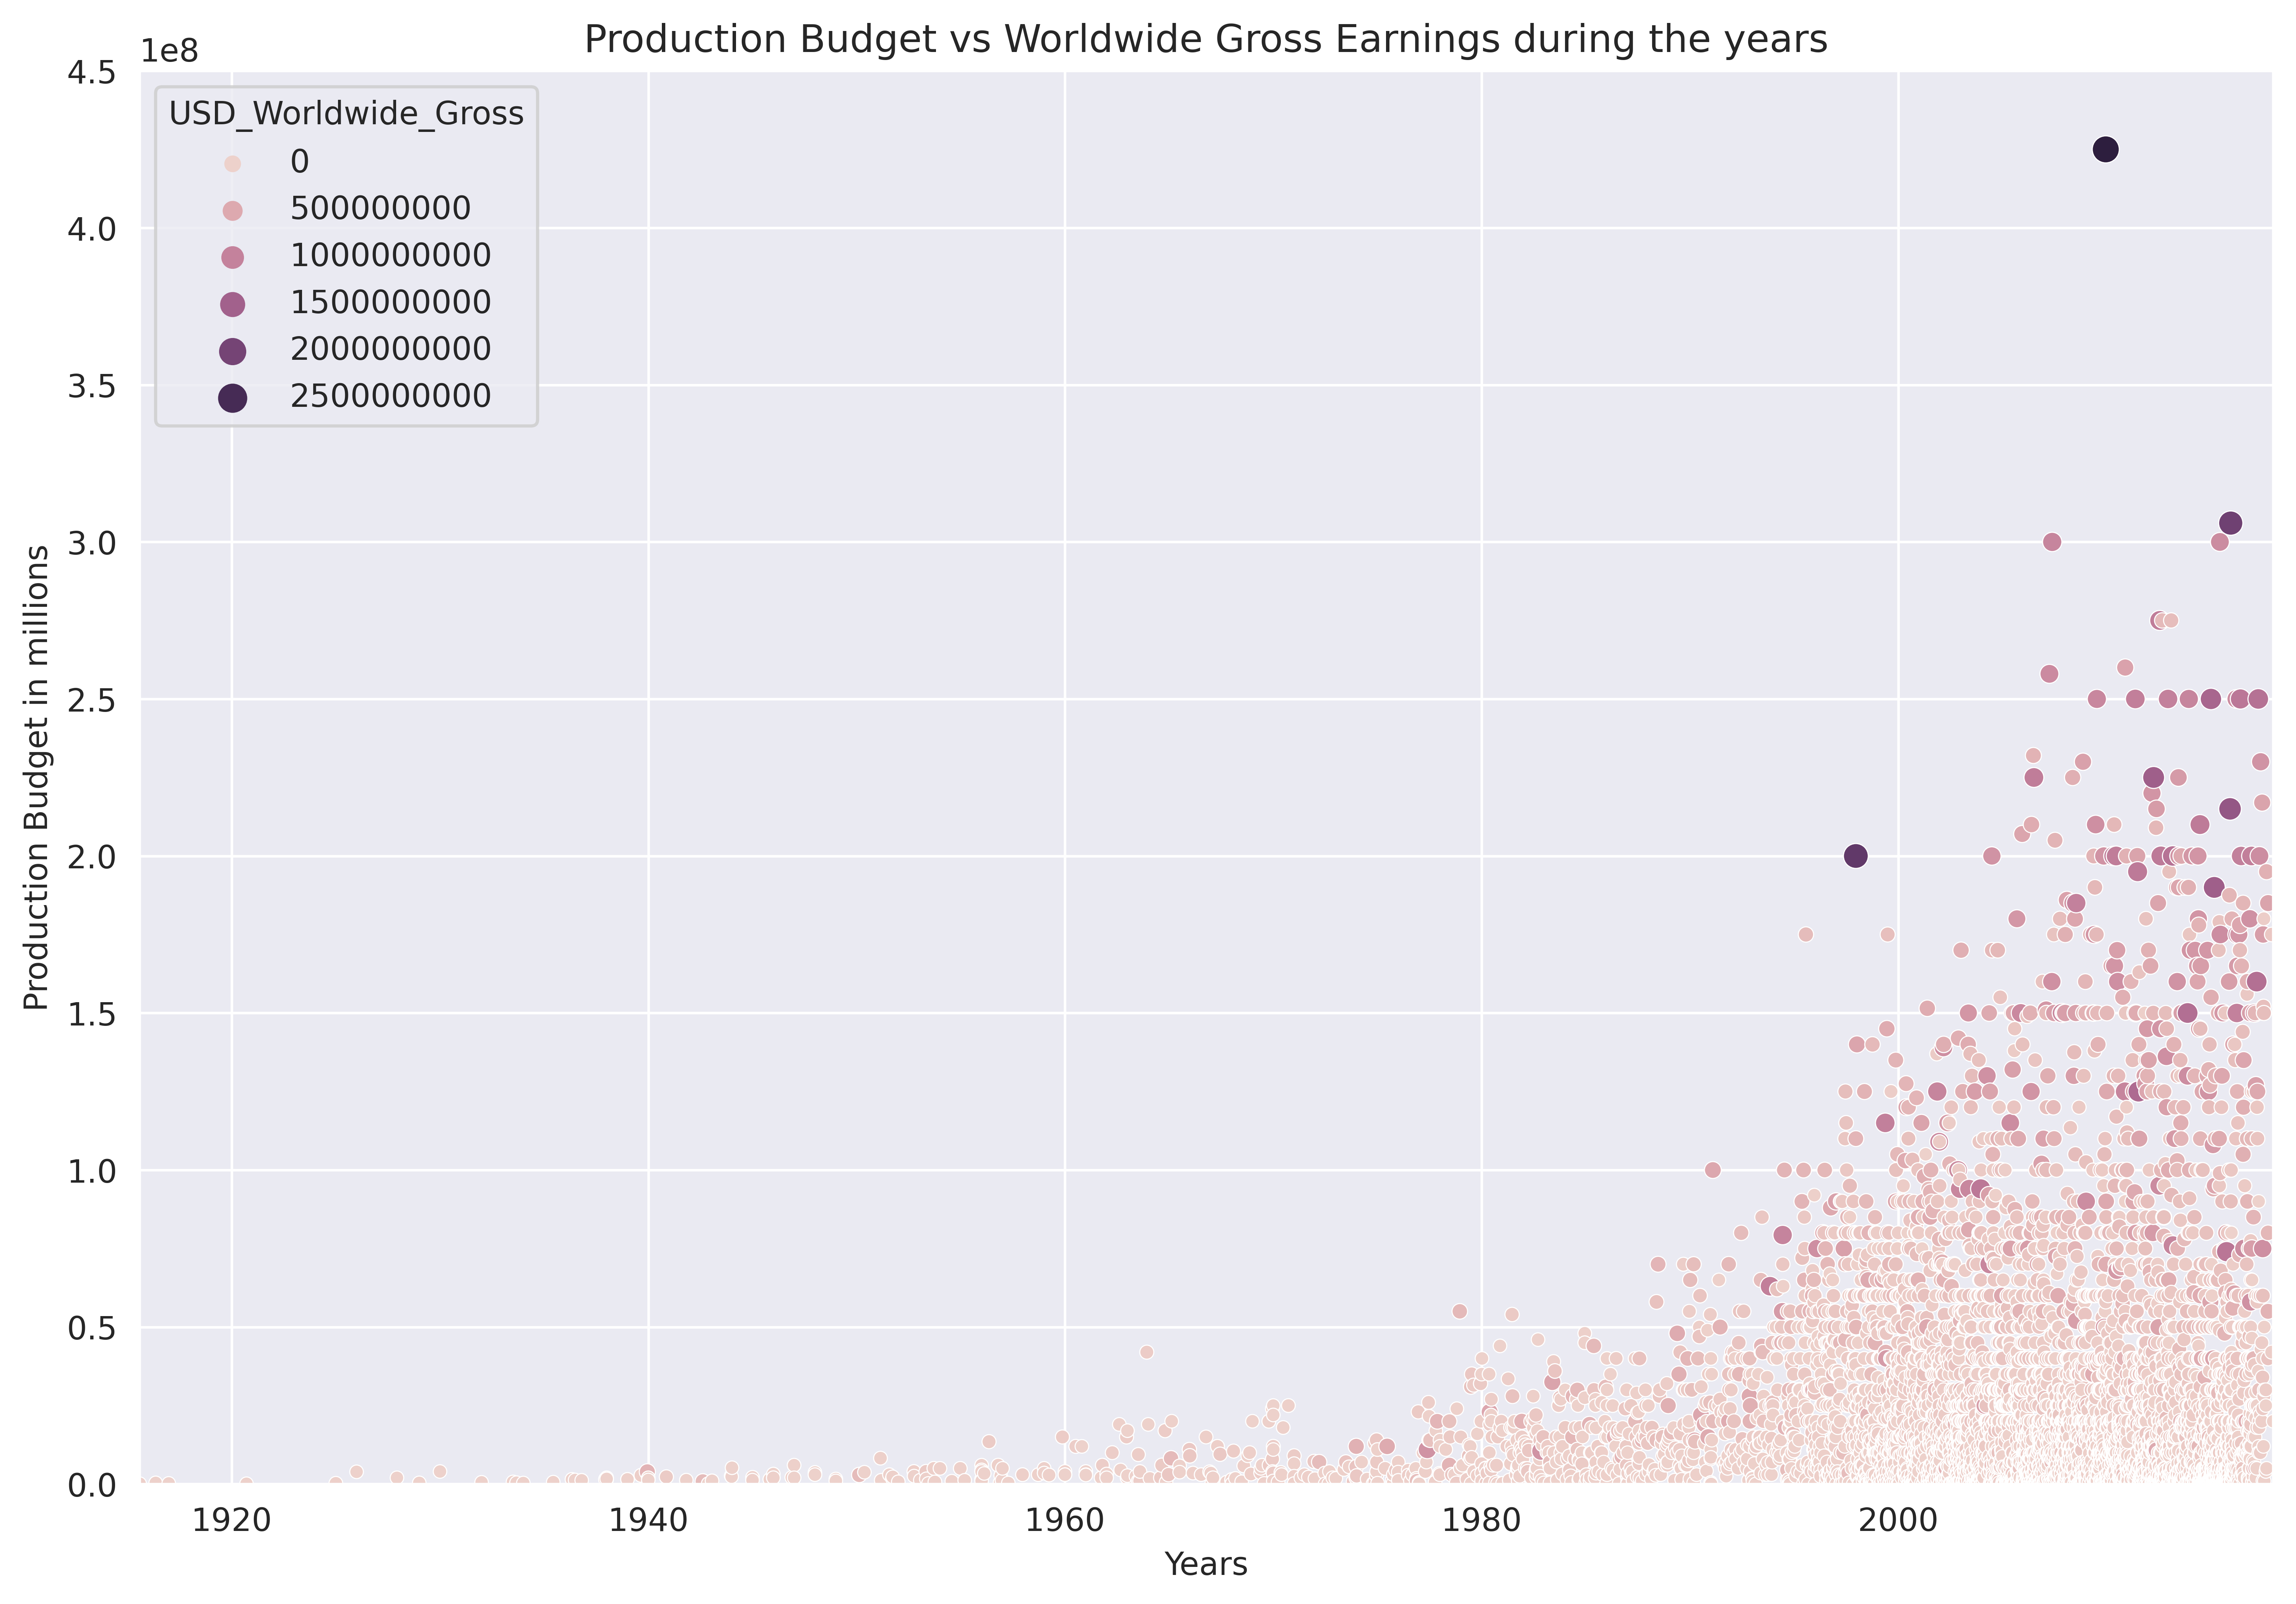

In [109]:
plt.figure(figsize=(12,8), dpi=600)

with sns.axes_style('darkgrid'):
    sns_graph = sns.scatterplot(x='Release_Date', 
                                y='USD_Production_Budget', 
                                data=data_clean,
                                hue='USD_Worldwide_Gross', # color by worldwide gross
                                size='USD_Worldwide_Gross') # size by worldwide gross
    sns_graph.set(ylabel='Production Budget in millions',
                xlabel='Years',
                title='Production Budget vs Worldwide Gross Earnings during the years',
                ylim=(0, 450000000),
                xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()))
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [110]:
data_clean['Decade'] = (data_clean.Release_Date.dt.year // 10) * 10 # here we used // because we want to get the integer value
data_clean.Decade.head(10)

C:\Users\andre\AppData\Local\Temp\ipykernel_18556\1999737944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = (data_clean.Release_Date.dt.year // 10) * 10 # here we used // because we want to get the integer value


0    1910
1    1910
2    1910
3    1920
4    1920
5    1920
6    1920
7    1920
8    1930
9    1930
Name: Decade, dtype: int64

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [111]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]
print(old_films.shape, new_films.shape)
old_films.USD_Production_Budget.max(), new_films.USD_Production_Budget.max()

(153, 7) (5231, 7)


(42000000, 425000000)

# Seaborn Regression Plots

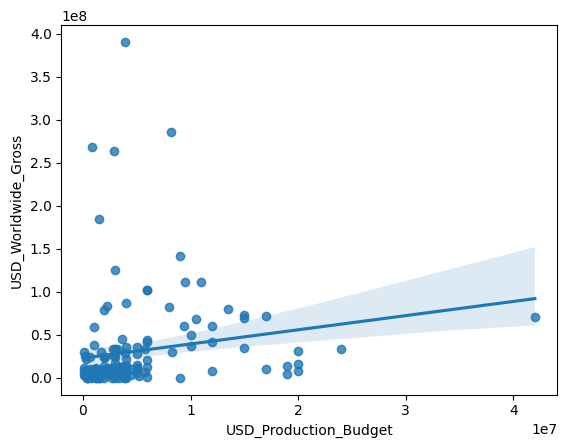

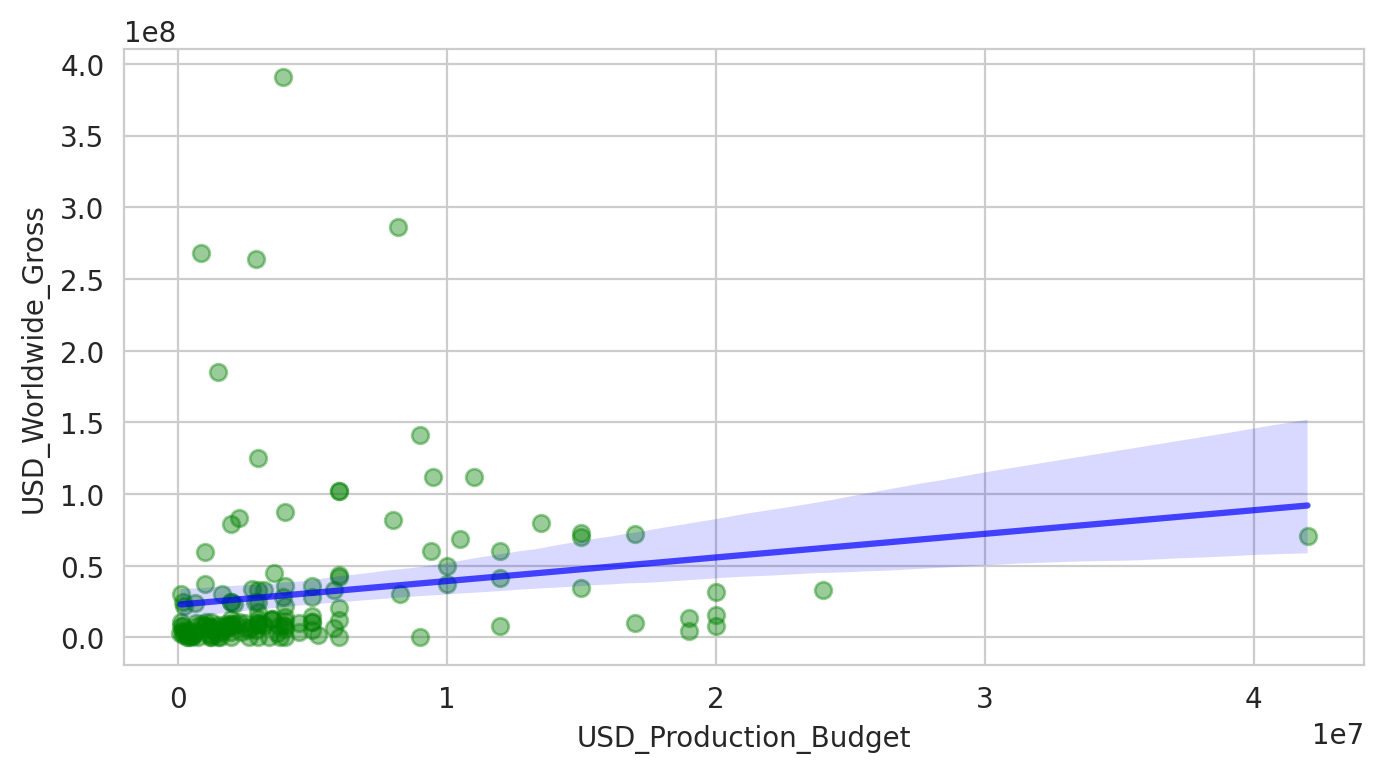

In [112]:
sns.regplot(x='USD_Production_Budget', y='USD_Worldwide_Gross', data=old_films) # first graph

plt.figure(figsize=(8,4), dpi=200) # second graph
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
                scatter_kws={'color':'green', 'alpha':0.4},
                line_kws={'color':'blue', 'alpha':0.7}) 

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

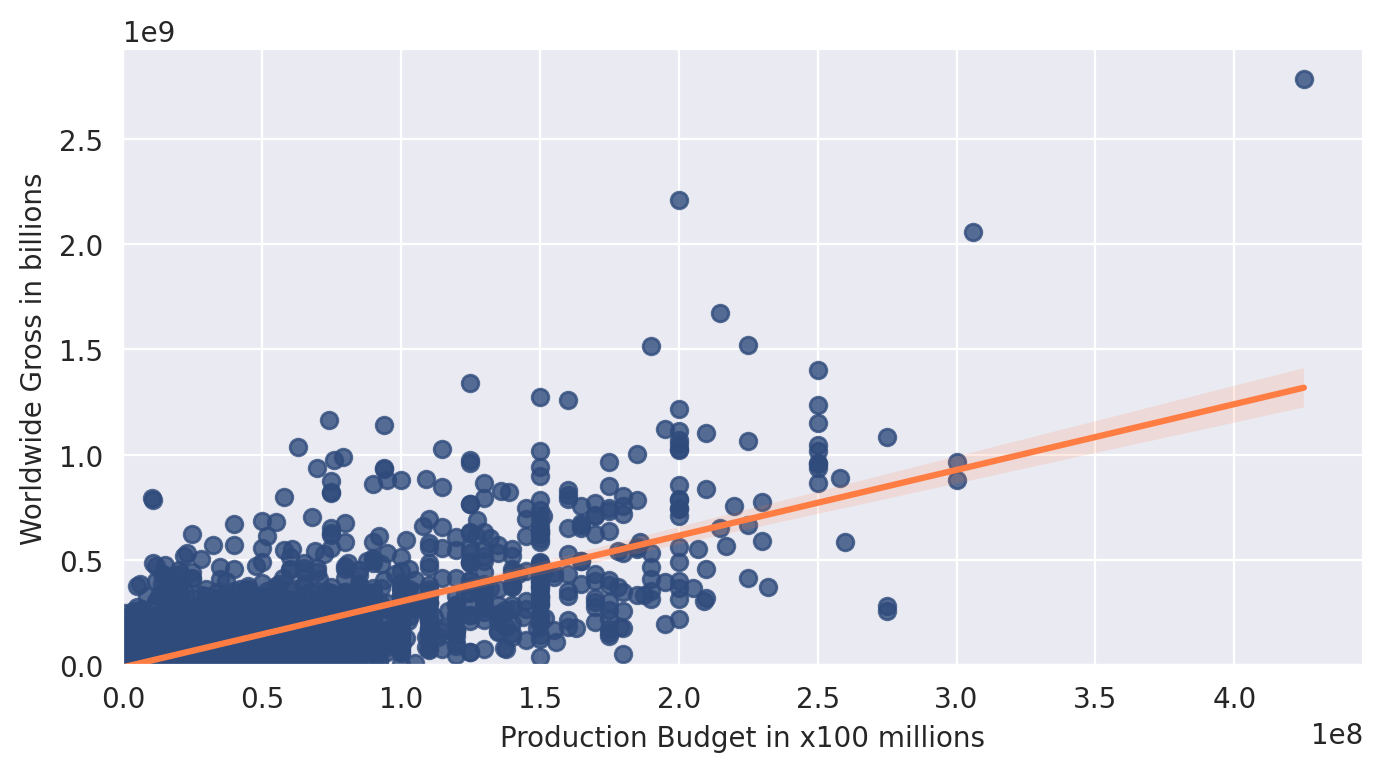

In [113]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
                scatter_kws={'color':'#2f4b7c'},
                line_kws={'color':'#ff7c43'})
    ax.set(xlim=(0),
           ylim=(0),
           ylabel=('Worldwide Gross in billions'),
           xlabel=('Production Budget in x100 millions'))

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 * BUDGET$$

In [114]:
regression = LinearRegression()

X = pd.DataFrame(new_films.USD_Production_Budget) # if more than one column just use columns=
y = pd.DataFrame(new_films.USD_Worldwide_Gross)

regression.fit(X, y)

# theta 0
print(regression.intercept_) 
# this means that whit a budget of 0 we will have a revenue of -8650768.00661038 $

# theta 1
regression.coef_
# this means that for every 1$ in the production budget we will have 3.12259592 $ in revenue

[-8650768.00661038]


array([[3.12259592]])

In [115]:
regression.score(X, y)
# this is the R^2 that is the coefficient of determination
# the closer to 1 the better

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [116]:
X = pd.DataFrame(old_films.USD_Production_Budget)
y = pd.DataFrame(old_films.USD_Worldwide_Gross)

regression.fit(X, y)

regression.intercept_

array([22821538.63508039])

In [117]:
regression.coef_

array([[1.64771314]])

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 * BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [118]:
budget = 350_000_000
prediction = regression.intercept_ + regression.coef_ * budget
print(prediction[0][0])
print(f"Prediction for a {budget/1000000:.0f} millions budget: {prediction[0][0]/1000000000:.2f} billions in revenue")

599521139.0388364
Prediction for a 350 millions budget: 0.60 billions in revenue
